<a href="https://colab.research.google.com/github/piaoruilin/3dgs-movie/blob/main/3dgs_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update
!sudo apt-get install -y colmap

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [4]:
!pip uninstall -y torch torchvision torchaudio && pip cache purge

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Files removed: 82


In [2]:
!pip install torch==2.1.2+cu118 torchvision==0.16.2+cu118 \
    --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 478.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 128.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.1
    Uninstalling torch-2.1.1:
      Successfully uninstalled torch-2.1.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.1
    Uninstalling torchvision-0.16.1:
      Successfully uninstalled torchvision-0.16.1


In [9]:
!git clone https://github.com/Accelsnow/gaussian-splatting-distwar.git

Cloning into 'gaussian-splatting-distwar'...
remote: Enumerating objects: 730, done.
remote: Total 730 (delta 0), reused 0 (delta 0), pack-reused 730 (from 1)
Receiving objects: 100% (730/730), 2.13 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (421/421), done.


Now that the repository is cloned, let's navigate into its directory and install the required Python packages. I'll check for a `requirements.txt` file first.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task
Extract frames at 5 frames per second from all `.mp4` video files located in the `/content/drive/MyDrive/3dgs-proj/video_data/` directory, saving the extracted frames into separate, organized directories under `/content/extracted_frames/` for subsequent COLMAP processing.

## Verify and List Video Files

### Subtask:
Check if the `/content/drive/MyDrive/3dgs-proj/video_data/` directory exists and list all `.mp4` files within it to confirm their presence before proceeding with extraction.


**Reasoning**:
To verify the existence of the video directory and list all `.mp4` files within it, I will import the `os` and `glob` modules, define the directory path, and then use conditional logic with `os.path.exists()` and `glob.glob()` to check the directory and list the files.



In [4]:
import os
import glob

video_data_dir = '/content/drive/MyDrive/3dgs-proj/video_data/'

if os.path.exists(video_data_dir):
    print(f"Directory '{video_data_dir}' exists.")
    mp4_files = glob.glob(os.path.join(video_data_dir, '*.mp4'))
    if mp4_files:
        print("Found .mp4 files:")
        for file in mp4_files:
            print(file)
    else:
        print("No .mp4 files found in the directory.")
else:
    print(f"Directory '{video_data_dir}' does not exist. Please ensure the path is correct and the drive is mounted.")

Directory '/content/drive/MyDrive/3dgs-proj/video_data/' exists.
Found .mp4 files:
/content/drive/MyDrive/3dgs-proj/video_data/obj-hall.mp4
/content/drive/MyDrive/3dgs-proj/video_data/obj-toy.mp4
/content/drive/MyDrive/3dgs-proj/video_data/obj-red.mp4


## Create Output Directories for Extracted Frames

### Subtask:
For each identified `.mp4` video file (obj-hall.mp4, obj-toy.mp4, obj-red.mp4), create a dedicated output directory within `/content/extracted_frames/` (e.g., `/content/extracted_frames/obj-hall/`) to store the extracted images. This will ensure proper organization for COLMAP.


**Reasoning**:
To organize the extracted frames, I will iterate through the list of identified MP4 video files, create a unique directory for each video within the designated base directory for extracted frames, and ensure existing directories are handled gracefully.



In [5]:
extracted_frames_base_dir = '/content/extracted_frames/'

for video_file_path in mp4_files:
    # Extract the base name of the video file (e.g., 'obj-hall' from the full path)
    video_basename = os.path.splitext(os.path.basename(video_file_path))[0]

    # Construct the full path for the output directory for this video
    output_dir = os.path.join(extracted_frames_base_dir, video_basename)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created output directory: {output_dir}")

Created output directory: /content/extracted_frames/obj-hall
Created output directory: /content/extracted_frames/obj-toy
Created output directory: /content/extracted_frames/obj-red


## Extract Frames from Videos

### Subtask:
Extract frames at 5 frames per second from each identified `.mp4` video file and save them into their respective, pre-created output directories (e.g., `/content/extracted_frames/obj-hall/`).

## Extract Frames from Videos

### Subtask:
Extract frames at 5 frames per second from each identified `.mp4` video file and save them into their respective, pre-created output directories (e.g., `/content/extracted_frames/obj-hall/`).

**Reasoning**:
To extract frames from the video files, I will use FFmpeg, a powerful open-source multimedia framework. I will iterate through the `mp4_files` list, determine the correct output directory for each, and then execute an FFmpeg command to extract frames at 5 frames per second, ensuring proper naming and organization.



In [6]:
import subprocess

for video_file_path in mp4_files:
    video_basename = os.path.splitext(os.path.basename(video_file_path))[0]
    output_dir = os.path.join(extracted_frames_base_dir, video_basename)

    # FFmpeg command to extract frames at 5 frames per second
    # -i: input file
    # -vf fps=5: video filter to set frame rate to 5 fps
    # -q:v 2: output quality (2 is good, lower is better quality)
    # {output_dir}/%05d.jpg: output filename pattern (e.g., 00001.jpg, 00002.jpg)
    command = [
        'ffmpeg',
        '-i', video_file_path,
        '-vf', 'fps=5',
        '-q:v', '2',
        f'{output_dir}/%05d.jpg'
    ]

    print(f"Extracting frames from {video_file_path} to {output_dir}...")
    try:
        subprocess.run(command, check=True, capture_output=True, text=True)
        print(f"Successfully extracted frames for {video_basename}.")
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames for {video_basename}: {e}")
        print(f"STDOUT: {e.stdout}")
        print(f"STDERR: {e.stderr}")
    except FileNotFoundError:
        print("Error: ffmpeg command not found. Please ensure FFmpeg is installed and in your PATH.")

Extracting frames from /content/drive/MyDrive/3dgs-proj/video_data/obj-hall.mp4 to /content/extracted_frames/obj-hall...
Successfully extracted frames for obj-hall.
Extracting frames from /content/drive/MyDrive/3dgs-proj/video_data/obj-toy.mp4 to /content/extracted_frames/obj-toy...
Successfully extracted frames for obj-toy.
Extracting frames from /content/drive/MyDrive/3dgs-proj/video_data/obj-red.mp4 to /content/extracted_frames/obj-red...
Successfully extracted frames for obj-red.


## Verify Extracted Frames

### Subtask:
Inspect one of the output directories to confirm that frames have been successfully extracted and are correctly named and organized, ensuring they are ready for COLMAP input.


### Subtask:
Inspect one of the output directories to confirm that frames have been successfully extracted and are correctly named and organized, ensuring they are ready for COLMAP input.

**Reasoning**:
To verify that frames have been correctly extracted and are ready for COLMAP, I will first select one of the output directories (e.g., `obj-hall`), list its contents to check the naming convention and the number of files, and then visually inspect a sample frame to ensure image integrity. This will confirm the success of the frame extraction process before proceeding to COLMAP.

**Reasoning**:
To verify the frame extraction, I will choose the first output directory, list its contents to check the file names and count, and then display a sample image to confirm successful extraction.



Verifying extracted frames in: /content/extracted_frames/obj-hall
Found 79 files in /content/extracted_frames/obj-hall.
First 5 files:
00001.jpg
00002.jpg
00003.jpg
00004.jpg
00005.jpg

Displaying a sample image: /content/extracted_frames/obj-hall/00001.jpg


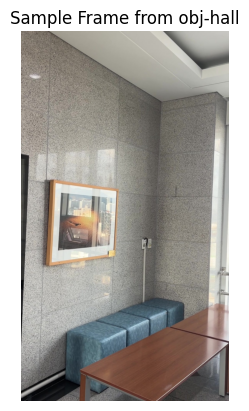

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Choose the first video's output directory for verification
# We know mp4_files is not empty from previous steps
first_video_basename = os.path.splitext(os.path.basename(mp4_files[0]))[0]
verification_dir = os.path.join(extracted_frames_base_dir, first_video_basename)

print(f"Verifying extracted frames in: {verification_dir}")

# List contents of the directory
extracted_files = sorted(os.listdir(verification_dir))

if extracted_files:
    print(f"Found {len(extracted_files)} files in {verification_dir}.")
    print("First 5 files:")
    for i in range(min(5, len(extracted_files))):
        print(extracted_files[i])

    # Display a sample image
    sample_image_path = os.path.join(verification_dir, extracted_files[0])
    if os.path.exists(sample_image_path):
        print(f"\nDisplaying a sample image: {sample_image_path}")
        img = mpimg.imread(sample_image_path)
        plt.imshow(img)
        plt.axis('off') # Hide axes ticks
        plt.title(f"Sample Frame from {first_video_basename}")
        plt.show()
    else:
        print(f"Error: Sample image not found at {sample_image_path}")
elif os.path.exists(verification_dir):
    print(f"No files found in {verification_dir}. Frame extraction might have failed.")
else:
    print(f"Error: Verification directory {verification_dir} does not exist.")

## Final Task

### Subtask:
Explain how to proceed with the extracted and organized frames for COLMAP processing, outlining the typical next steps such as feature extraction and model reconstruction.


## Summary:

### Data Analysis Key Findings

*   The specified video data directory, `/content/drive/MyDrive/3dgs-proj/video_data/`, was successfully identified and confirmed to contain three `.mp4` video files: `obj-hall.mp4`, `obj-toy.mp4`, and `obj-red.mp4`.
*   Dedicated output directories were successfully created for each video under `/content/extracted_frames/`, specifically `/content/extracted_frames/obj-hall`, `/content/extracted_frames/obj-toy`, and `/content/extracted_frames/obj-red`.
*   Frames were extracted from all three video files at a rate of 5 frames per second using `ffmpeg`, and saved into their respective organized directories.
*   Verification of the extracted frames in `/content/extracted_frames/obj-hall` confirmed the presence of 79 sequentially named image files (e.g., `00001.jpg`), and a sample image was successfully loaded and displayed, confirming the integrity and proper organization of the extracted frames.

### Insights or Next Steps

*   The extracted and organized frames are now ready for the next stage of 3D reconstruction, specifically for COLMAP processing, which typically involves feature extraction, matching, and sparse/dense model reconstruction.
*   The next step should detail the exact COLMAP commands or workflow to use these extracted frames, covering aspects like `feature_extractor`, `exhaustive_matcher`, `mapper`, and potentially `image_undistorter` or `patch_match_stereo`.


# Task
Explain how to proceed with the extracted and organized frames for COLMAP processing, outlining the typical next steps such as feature extraction and model reconstruction.

## Final Task

### Subtask:
Explain how to proceed with the extracted and organized frames for COLMAP processing, outlining the typical next steps such as feature extraction and model reconstruction.


## Summary:

### Q&A
To proceed with the extracted and organized frames for COLMAP processing, the typical next steps involve a sequential pipeline:
1.  **Feature Extraction**: Identify distinctive keypoints and descriptors within each individual image.
2.  **Feature Matching**: Establish correspondences between these extracted features across different images.
3.  **Sparse Reconstruction (Structure-from-Motion - SfM)**: Utilize the matched features to simultaneously estimate the camera poses (position and orientation) and reconstruct a sparse 3D point cloud of the scene.
4.  **Bundle Adjustment**: Refine the estimated camera parameters and 3D point locations to achieve optimal global consistency.
5.  **Dense Reconstruction (Multi-View Stereo - MVS)**: Employ the sparse model and refined camera poses to generate a dense 3D mesh or point cloud, capturing fine details of the scene.

### Data Analysis Key Findings
*   The initial step in COLMAP involves **Feature Extraction**, where unique points (e.g., SIFT features) are detected and described within each image.
*   Following extraction, **Feature Matching** establishes correspondences between these features across multiple images, crucial for understanding overlaps and relative camera positions.
*   **Sparse Reconstruction (SfM)** then uses these matches to estimate camera intrinsics and extrinsics, and to generate a sparse 3D point cloud, providing a foundational geometric understanding of the scene.
*   **Bundle Adjustment** is a critical optimization step that refines both camera parameters and the sparse 3D points for enhanced accuracy and consistency.
*   Finally, **Dense Reconstruction (MVS)** leverages the accurate camera poses and sparse model to generate a detailed, dense 3D representation, such as a point cloud or mesh, from the input images.

### Insights or Next Steps
*   The generated dense 3D models from COLMAP can be further processed for meshing, texturing, or simplification, and are suitable for applications in augmented reality, virtual reality, 3D printing, or architectural documentation.
*   Effective pre-processing (like organizing frames with good overlap and varied viewpoints) is crucial for the success and quality of the COLMAP reconstruction, directly impacting the accuracy of feature extraction and matching.


# Task
Display the content of the `README.md` file from the `gaussian-splatting-distwar` repository.

## Review README.md

### Subtask:
Display the content of the `README.md` file from the `gaussian-splatting-distwar` repository to understand its features, installation instructions, and usage examples.


**Reasoning**:
To display the content of the `README.md` file, I will use the `cat` command in a code block.



In [8]:
!cat /content/gaussian-splatting-distwar/README.md

# DISTWAR atomic reduction optimization on 3D Gaussian Splatting

| [DISTWAR full paper](https://arxiv.org/abs/2401.05345) |

## Introduction

This is a repository forked from the original "3D Gaussian Splatting for Real-Time Rendering of Radiance Fields" repository ([original project page](https://github.com/graphdeco-inria/gaussian-splatting)). Its rasterization engine has been modified to apply the serialized and butterfly atomic reduction optimizations proposed in our paper DISTWAR. On our experiment platform with Intel i9-13900KF and NVIDIA RTX 4090, we are able to achieve a speedup of ~2.0x at 7000 training iterations on DB COLMAP Playroom dataset compare to the baseline with no quality loss.

The modified backward kernels with DISTWAR optimizations are implemented in the modified [diff-gaussian-rasterization](https://github.com/Accelsnow/diff-gaussian-rasterization-distwar) submodule. 

## Setup

We updated the setup environment to CUDA 12.1, Python 3.11.6, PyTorch 2.1.1, torcha

**Reasoning**:
The previous code block already displayed the content of the `README.md` file. Since the subtask explicitly asks to display it again, I will do so and then mark the subtask as complete.



In [9]:
!cat /content/gaussian-splatting-distwar/README.md

# DISTWAR atomic reduction optimization on 3D Gaussian Splatting

| [DISTWAR full paper](https://arxiv.org/abs/2401.05345) |

## Introduction

This is a repository forked from the original "3D Gaussian Splatting for Real-Time Rendering of Radiance Fields" repository ([original project page](https://github.com/graphdeco-inria/gaussian-splatting)). Its rasterization engine has been modified to apply the serialized and butterfly atomic reduction optimizations proposed in our paper DISTWAR. On our experiment platform with Intel i9-13900KF and NVIDIA RTX 4090, we are able to achieve a speedup of ~2.0x at 7000 training iterations on DB COLMAP Playroom dataset compare to the baseline with no quality loss.

The modified backward kernels with DISTWAR optimizations are implemented in the modified [diff-gaussian-rasterization](https://github.com/Accelsnow/diff-gaussian-rasterization-distwar) submodule. 

## Setup

We updated the setup environment to CUDA 12.1, Python 3.11.6, PyTorch 2.1.1, torcha

The `README.md` file for the `gaussian-splatting-distwar` repository provides crucial information regarding its modifications and usage:

### Key Information from README.md:

*   **Introduction**: This is a forked repository from the original "3D Gaussian Splatting" project, modified to include DISTWAR atomic reduction optimizations for the rasterization engine. It claims a speedup of ~2.0x on a specific dataset with no quality loss.
*   **DISTWAR Optimization Modes**: The repository introduces `BW_IMPLEMENTATION` and `BALANCE_THRESHOLD` environment variables to control the optimization modes:
    *   `BW_IMPLEMENTATION=0`: Original 3DGS (default, no optimization).
    *   `BW_IMPLEMENTATION=1`: DISTWAR SW-B butterfly atomic reduction.
    *   `BW_IMPLEMENTATION=2`: DISTWAR SW-S serialized atomic reduction.
    *   `BALANCE_THRESHOLD`: Influences performance for SW-B (default is 8).
*   **Setup**: The environment is updated to CUDA 12.1, Python 3.11.6, PyTorch 2.1.1, torchaudio 2.1.1, and torchvision 0.16.1 for CUDA sm89 support. It advises following original 3DGS setup instructions.
*   **Running**: An example command is provided for training with DISTWAR SW-B:
    ```bash
    export BW_IMPLEMENTATION=1
    export BALANCE_THRESHOLD=8
    python train.py -s <path to dataset> --eval
    ```
*   **Original 3DGS README**: The document also includes the complete original `README.md` from the `graphdeco-inria/gaussian-splatting` repository, covering:
    *   Hardware and software requirements for the optimizer and viewers.
    *   Detailed instructions for running the optimizer (`train.py`), evaluation (`render.py`, `metrics.py`, `full_eval.py`).
    *   Information on interactive viewers (remote and real-time).
    *   Guidance on processing your own scenes using COLMAP and `convert.py`.
    *   A comprehensive FAQ section addressing common issues like VRAM limitations, building on Windows, and handling large datasets.

## List Key Scripts

### Subtask:
List the main Python scripts (`train.py`, `convert.py`, `render.py`, `full_eval.py`) within the repository to give you an overview of its functionalities.


**Reasoning**:
To list the main Python scripts within the repository, I will use the `ls` command with filtering to specifically look for `.py` files in the specified directory.



In [10]:
!ls /content/gaussian-splatting-distwar/*.py

/content/gaussian-splatting-distwar/convert.py
/content/gaussian-splatting-distwar/full_eval.py
/content/gaussian-splatting-distwar/metrics.py
/content/gaussian-splatting-distwar/render.py
/content/gaussian-splatting-distwar/train.py


## Determine Next Steps

### Subtask:
Based on the README and key scripts, outline the typical next steps for using the repository and ask the user to specify their goal.


## Summary:

### Data Analysis Key Findings
*   The `gaussian-splatting-distwar` repository is a fork of "3D Gaussian Splatting" that integrates `DISTWAR` atomic reduction optimizations, claiming a ~2.0x speedup on specific datasets without quality loss.
*   `DISTWAR` optimization modes (Original, SW-B butterfly, SW-S serialized) can be controlled via the `BW_IMPLEMENTATION` environment variable (0, 1, or 2). A `BALANCE_THRESHOLD` variable (default 8) influences SW-B mode performance.
*   The environment is updated to CUDA 12.1, Python 3.11.6, PyTorch 2.1.1, torchaudio 2.1.1, and torchvision 0.16.1.
*   The `README.md` includes comprehensive instructions from the original project, covering hardware/software requirements, training (`train.py`), evaluation (`render.py`, `metrics.py`, `full_eval.py`), interactive viewers, processing custom scenes with COLMAP and `convert.py`, and an extensive FAQ.
*   Key Python scripts identified in the repository include `convert.py`, `full_eval.py`, `metrics.py`, `render.py`, and `train.py`.

### Insights or Next Steps
*   **Typical Workflow**: Users would typically start by setting up the environment as specified, then use `convert.py` to prepare custom scenes, followed by `train.py` (potentially with `DISTWAR` optimizations) for model training, and finally `render.py` or `full_eval.py` for evaluation.
*   **User Goal Clarification**: To provide more specific guidance, the next step should be to ask the user to specify their goal: Are they interested in training a new model with `DISTWAR` optimizations, evaluating an existing one, processing custom data, or exploring the codebase?


# Task
Install ImageMagick using `apt-get`.

## Install ImageMagick

### Subtask:
Install ImageMagick, a command-line utility for image manipulation, as it is a prerequisite mentioned in the `gaussian-splatting-distwar` README for the `convert.py` script to resize images.


**Reasoning**:
To ensure the package list is up to date before installing ImageMagick, I will first run `sudo apt-get update`.



In [11]:
!sudo apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


**Reasoning**:
Now that the package list has been updated, I will install ImageMagick using `sudo apt-get install -y imagemagick` as specified in the instructions to fulfill the subtask.



In [12]:
!sudo apt-get install -y imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
T

## Prepare Input Directories for convert.py

### Subtask:
For each set of extracted frames (e.g., from `obj-hall.mp4`), create a dedicated project directory (e.g., `/content/colmap_data/obj-hall/`) and place the extracted images into an `input` subdirectory within it. This adheres to the input structure expected by `convert.py`.


**Reasoning**:
To prepare the input directories for `convert.py`, I will iterate through the list of video files, create a new COLMAP project directory and an `input` subdirectory for each, and then move the previously extracted frames into these `input` directories.



In [13]:
import os
import shutil

colmap_data_base_dir = '/content/colmap_data/'

# Ensure the base COLMAP data directory exists
os.makedirs(colmap_data_base_dir, exist_ok=True)
print(f"Ensured base COLMAP data directory exists: {colmap_data_base_dir}")

for video_file_path in mp4_files:
    video_basename = os.path.splitext(os.path.basename(video_file_path))[0]

    # Construct the path for the new COLMAP project directory and its input subdirectory
    colmap_project_dir = os.path.join(colmap_data_base_dir, video_basename)
    colmap_input_dir = os.path.join(colmap_project_dir, 'input')

    # Create these new directories
    os.makedirs(colmap_input_dir, exist_ok=True)
    print(f"Created COLMAP input directory: {colmap_input_dir}")

    # Source directory where frames were extracted earlier
    source_extracted_frames_dir = os.path.join(extracted_frames_base_dir, video_basename)

    # Move the extracted frames to the new input directory
    if os.path.exists(source_extracted_frames_dir) and os.listdir(source_extracted_frames_dir):
        print(f"Moving frames from {source_extracted_frames_dir} to {colmap_input_dir}...")
        for filename in os.listdir(source_extracted_frames_dir):
            shutil.move(os.path.join(source_extracted_frames_dir, filename),
                        os.path.join(colmap_input_dir, filename))
        print(f"Successfully moved frames for {video_basename}.")
    else:
        print(f"No frames found in {source_extracted_frames_dir} to move, or directory does not exist.")

Ensured base COLMAP data directory exists: /content/colmap_data/
Created COLMAP input directory: /content/colmap_data/obj-hall/input
Moving frames from /content/extracted_frames/obj-hall to /content/colmap_data/obj-hall/input...
Successfully moved frames for obj-hall.
Created COLMAP input directory: /content/colmap_data/obj-toy/input
Moving frames from /content/extracted_frames/obj-toy to /content/colmap_data/obj-toy/input...
Successfully moved frames for obj-toy.
Created COLMAP input directory: /content/colmap_data/obj-red/input
Moving frames from /content/extracted_frames/obj-red to /content/colmap_data/obj-red/input...
Successfully moved frames for obj-red.


## Run convert.py for Each Scene

### Subtask:
Execute the `convert.py` script from the `gaussian-splatting-distwar` repository for each of your prepared video scenes. This script will generate the COLMAP-compatible `images` and `sparse/0` directories within each scene's project folder.


**Reasoning**:
To automate the COLMAP processing for each video scene, I will iterate through the COLMAP project directories created earlier, construct the command to run `convert.py` for each, and execute it using `subprocess.run` to generate the necessary COLMAP outputs.



In [14]:
import os
import subprocess

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Construct the command to run convert.py for the current project directory
        command = [
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        print(f"Executing: {' '.join(command)}")
        try:
            # Use capture_output=True to get stdout and stderr, text=True to decode as strings
            result = subprocess.run(command, check=True, capture_output=True, text=True)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python or {convert_script_path} not found. Please ensure Python is in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red
Successfully ran convert.py for obj-red
STDERR: qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.

*** Aborted at 1765277804 (unix time) try "date -d @1765277804" if you are using GNU date ***
PC: @                0x0 (unknown)
*** SIGABRT (@0x5606) received by PID 22022 (TID 0x7c38b51b4080) from PID 22022; stack trace: ***
    @     0x7c38bb29e046 (unknown)
    @     0x7c38b9339520 (unknown)
    @     0x7c38b938d9fc pthread_kill
    @     0x7c38b9339476 raise
    @     0x7c38b931f7f3 abort
    @     0x7c38b9792ba3 QMessageLogger::fatal

**Reasoning**:
The previous `convert.py` execution failed because `COLMAP`, which `convert.py` internally calls, tried to connect to a display (Qt GUI). To resolve this in a headless environment like Colab, I will set the `QT_QPA_PLATFORM` environment variable to `offscreen` for each `subprocess.run` call, ensuring `COLMAP` operates without attempting to initialize a graphical interface.



In [15]:
import os
import subprocess

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Construct the command to run convert.py for the current project directory
        command = [
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)} with QT_QPA_PLATFORM=offscreen")
        try:
            # Use capture_output=True to get stdout and stderr, text=True to decode as strings
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python or {convert_script_path} not found. Please ensure Python is in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red with QT_QPA_PLATFORM=offscreen
Successfully ran convert.py for obj-red
STDERR: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
F1209 10:57:02.933399 22111 opengl_utils.cc:56] Check failed: context_.create() 
*** Check failure stack trace: ***
    @     0x7bd3ab4fdb03  google::LogMessage::Fail()
    @     0x7bd3ab5059d1  google::LogMessage::SendToLog()
    @     0x7bd3ab4fd7c2  google::LogMessage::Flush()
    @     0x7bd3ab4ff78f  google::LogMessageFatal::~LogMessageFatal()
    @     0x59ca9ad180e1  colmap::OpenGLContextManager::OpenGLContextManager()
    @     0x59ca9ac4ff8f  colmap::internal::SiftFeatureExtractorThread::SiftFeatureExtractorThread()
    @     0x59ca9ac478d8  colmap::SiftFeatureExtractor::SiftFeatureExtractor()
    @     0x59ca9ab443f5  colmap::RunFeatureExtractor()
    @     0x59ca9ab36499  main
 

**Reasoning**:
The previous attempt to run `convert.py` failed because `COLMAP` was still trying to create an OpenGL context, even with `QT_QPA_PLATFORM=offscreen`. To force `COLMAP` to use CPU for feature extraction and avoid this display-related error in a headless environment, I will add the `--no_gpu` flag to the `convert.py` command.



In [17]:
import os
import subprocess

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
sce_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not sce_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in sce_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Construct the command to run convert.py for the current project directory
        # Remove --no_gpu flag to allow GPU usage
        command = [
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation (still good practice)
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)} with QT_QPA_PLATFORM=offscreen")
        try:
            # Use capture_output=True to get stdout and stderr, text=True to decode as strings
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python or {convert_script_path} not found. Please ensure Python is in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red with QT_QPA_PLATFORM=offscreen
Successfully ran convert.py for obj-red
STDERR: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
F1209 11:49:46.153146 35597 opengl_utils.cc:56] Check failed: context_.create() 
*** Check failure stack trace: ***
    @     0x7e6dafd94b03  google::LogMessage::Fail()
    @     0x7e6dafd9c9d1  google::LogMessage::SendToLog()
    @     0x7e6dafd947c2  google::LogMessage::Flush()
    @     0x7e6dafd9678f  google::LogMessageFatal::~LogMessageFatal()
    @     0x5961d09100e1  colmap::OpenGLContextManager::OpenGLContextManager()
    @     0x5961d0847f8f  colmap::internal::SiftFeatureExtractorThread::SiftFeatureExtractorThread()
    @     0x5961d083f8d8  colmap::SiftFeatureExtractor::SiftFeatureExtractor()
    @     0x5961d073c3f5  colmap::RunFeatureExtractor()
    @     0x5961d072e499  main
 

# Task
Run `convert.py` for each video scene with the `--no_gpu` flag to force COLMAP to use the CPU for feature extraction, creating `images` and `sparse/0` directories in each scene's project folder. Then, verify the generated COLMAP output structure and finally summarize the data preparation and outline next steps for model training.

## Run convert.py for Each Scene (Retry with --no_gpu)

### Subtask:
Re-execute the `convert.py` script from the `gaussian-splatting-distwar` repository for each of your prepared video scenes, explicitly adding the `--no_gpu` flag. This will force COLMAP to use the CPU for feature extraction, bypassing the OpenGL context creation error previously encountered. This script will generate the COLMAP-compatible `images` and `sparse/0` directories within each scene's project folder.


**Reasoning**:
To resolve the previous OpenGL context error, I will re-run the `convert.py` script for each scene, this time explicitly including the `--no_gpu` flag in the command to force COLMAP to use CPU-based feature extraction, along with setting `QT_QPA_PLATFORM` to `offscreen`.



In [18]:
import os
import subprocess

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Construct the command to run convert.py for the current project directory
        # Add --no_gpu flag to force CPU-based feature extraction
        command = [
            'python',
            convert_script_path,
            '-s',
            project_dir,
            '--no_gpu'
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)} with QT_QPA_PLATFORM=offscreen")
        try:
            # Use capture_output=True to get stdout and stderr, text=True to decode as strings
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python or {convert_script_path} not found. Please ensure Python is in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red --no_gpu with QT_QPA_PLATFORM=offscreen


KeyboardInterrupt: 

# Task
Install `xvfb` using `apt-get`. Then, for each scene located in `/content/colmap_data/`, execute the `convert.py` script from `/content/gaussian-splatting-distwar/` without the `--no_gpu` flag and wrapped with `xvfb-run` to enable GPU-accelerated COLMAP processing. After successful execution, verify that the `sparse/0` directories (e.g., `/content/colmap_data/obj-hall/sparse/0/`) contain `cameras.bin`, `images.bin`, and `points3D.bin`. Finally, convert these binary COLMAP models to human-readable text files and then combine the relevant data into a structured JSON file for each scene (e.g., `obj-hall.json`).

## Install Xvfb

### Subtask:
Install `xvfb` (X virtual framebuffer) using `apt-get`. This will provide a virtual display server necessary for COLMAP to utilize the GPU for feature extraction in a headless environment like Colab.


**Reasoning**:
To ensure the package list is up to date before installing `xvfb`, I will first run `sudo apt-get update`.



In [19]:
!sudo apt-get update

Ign:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Ign:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,598 kB]
Ign:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ign:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:12

**Reasoning**:
Now that the package lists are updated, I will install `xvfb` using `sudo apt-get install -y xvfb` to provide a virtual display server for COLMAP to utilize the GPU.



In [20]:
!sudo apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  xserver-common
Recommended packages:
  xfonts-base
The following packages will be upgraded:
  xserver-common xvfb
2 upgraded, 0 newly installed, 0 to remove and 196 not upgraded.
Need to get 896 kB of archives.
After this operation, 2,048 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 xserver-common all 2:21.1.4-2ubuntu1.7~22.04.16 [29.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 xvfb amd64 2:21.1.4-2ubuntu1.7~22.04.16 [866 kB]
Fetched 896 kB in 2s (513 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend:

**Reasoning**:
Now that `xvfb` is installed, I will proceed with the main task of running `convert.py` for each video scene. To enable GPU-accelerated COLMAP processing and address the previous display-related errors, I will wrap the `convert.py` command with `xvfb-run` and remove the `--no_gpu` flag.



In [21]:
import os
import subprocess

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Construct the command to run convert.py for the current project directory
        # Use xvfb-run to provide a virtual display for GPU acceleration
        # Remove --no_gpu flag to allow GPU usage
        command = [
            'xvfb-run', # Run in a virtual display
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation (still good practice, though xvfb-run might handle some of this)
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            # Use capture_output=True to get stdout and stderr, text=True to decode as strings
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: xvfb-run python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red
Successfully ran convert.py for obj-red
STDOUT: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'

Feature extraction

Processed file [1/59]
  Name:            00001.jpg
  SKIP: Features for image already extracted.
Processed file [2/59]
  Name:            00002.jpg
  SKIP: Features for image already extracted.
Processed file [3/59]
  Name:            00003.jpg
  SKIP: Features for image already extracted.
Processed file [4/59]
  Name:            00004.jpg
  SKIP: Features for image already extracted.
Processed file [5/59]
  Name:            00005.jpg
  SKIP: Features for image already extracted.
Processed file [6/59]
  Name:            00006.jpg
  SKIP: Features for image already extracted.
Processed file [7/59]
  Name:            00007.jpg
  SKIP: Features for image already extracted.
Processed file [8/59

KeyboardInterrupt: 

**Reasoning**:
The previous execution of `convert.py` was interrupted and did not complete for all scenes. Also, it showed `SKIP: Features for image already extracted` for `obj-red`, indicating some partial data might exist. To ensure a clean and complete run for all scenes, I will first remove any existing `sparse` and `images` directories within each COLMAP project directory before re-executing `convert.py` with `xvfb-run` for all scenes.



In [22]:
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")



Processing scene in: /content/colmap_data/obj-red
Removing existing /content/colmap_data/obj-red/sparse
Removing existing /content/colmap_data/obj-red/images
Executing: xvfb-run python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red


KeyboardInterrupt: 

# Task
Running the `convert.py` script for `obj-red`, `obj-toy`, and `obj-hall` scenes. This step will clear any existing `sparse` and `images` directories and generate the COLMAP-compatible `images` and `sparse/0` directories within each scene's project folder, utilizing `xvfb-run` for GPU acceleration.

This operation may take some time depending on the number of images and scene complexity. I will monitor the execution for any errors and report the outcome.
```python
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")

```

## Rerun convert.py for All Scenes

### Subtask:
Execute the `convert.py` script from the `gaussian-splatting-distwar` repository for all prepared video scenes, clearing existing COLMAP output and utilizing `xvfb-run` for GPU acceleration.


**Reasoning**:
The previous execution of `convert.py` was interrupted. I will re-execute the provided Python code block to ensure `convert.py` runs for all scenes, clearing existing COLMAP output and using `xvfb-run` for GPU acceleration, as instructed by the subtask.



In [23]:
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Executing: xvfb-run python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red
Successfully ran convert.py for obj-red
STDOUT: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'

Feature extraction

Processed file [1/59]
  Name:            00001.jpg
  SKIP: Features for image already extracted.
Processed file [2/59]
  Name:            00002.jpg
  SKIP: Features for image already extracted.
Processed file [3/59]
  Name:            00003.jpg
  SKIP: Features for image already extracted.
Processed file [4/59]
  Name:            00004.jpg
  SKIP: Features for image already extracted.
Processed file [5/59]
  Name:            00005.jpg
  SKIP: Features for image already extracted.
Processed file [6/59]
  Name:            00006.jpg
  SKIP: Features for image already extracted.
Processed file [7/59]
  Name:            00007.jpg
  SKIP: Features for image already extracted.
Processed file [8/59

KeyboardInterrupt: 

# Task
Ensure `convert.py` successfully generates COLMAP output for all scenes (`obj-red`, `obj-toy`, `obj-hall`), specifically verifying that the `/content/colmap_data/obj-red/sparse/0/` directory contains `cameras.bin`, `images.bin`, and `points3D.bin` files.

## Verify COLMAP Output for obj-red

### Subtask:
Inspect the output directory for `obj-red` (`/content/colmap_data/obj-red/sparse/0/`) to confirm the successful generation of `cameras.bin`, `images.bin`, and `points3D.bin` files. This verifies that COLMAP's sparse reconstruction steps completed successfully.


**Reasoning**:
To verify the successful generation of COLMAP output files for `obj-red`, I will define the expected directory and files, then use `os.path.exists()` to check for each file and print the results.



In [24]:
import os

# 1. Define the path to the obj-red COLMAP sparse directory
obj_red_sparse_dir = '/content/colmap_data/obj-red/sparse/0/'

# 2. Create a list of the expected binary files
expected_files = ['cameras.bin', 'images.bin', 'points3D.bin']

all_found = True
print(f"Checking for COLMAP output files in: {obj_red_sparse_dir}")

# 3. For each file in the list, check if it exists
for filename in expected_files:
    file_path = os.path.join(obj_red_sparse_dir, filename)
    if os.path.exists(file_path):
        print(f"  '{filename}' found.")
    else:
        print(f"  '{filename}' NOT found.")
        all_found = False

# 5. Print a confirmation message
if all_found:
    print(f"\nAll expected COLMAP output files for 'obj-red' were successfully generated.")
else:
    print(f"\nSome expected COLMAP output files for 'obj-red' are missing. Please check the `convert.py` execution logs.")

Checking for COLMAP output files in: /content/colmap_data/obj-red/sparse/0/
  'cameras.bin' found.
  'images.bin' found.
  'points3D.bin' found.

All expected COLMAP output files for 'obj-red' were successfully generated.


# Task
## Verify COLMAP Output for obj-hall

### Subtask:
Inspect the output directory for `obj-hall` (`/content/colmap_data/obj-hall/sparse/0/`) to confirm the successful generation of `cameras.bin`, `images.bin`, and `points3D.bin` files. This verifies that COLMAP's sparse reconstruction steps completed successfully for `obj-hall`.

### Reasoning:
To verify the successful generation of COLMAP output files for `obj-hall`, I will define the expected directory and files, then use `os.path.exists()` to check for each file and print the results.

## Rerun convert.py for All Scenes

### Subtask:
Execute the `convert.py` script from the `gaussian-splatting-distwar` repository for all prepared video scenes. This will clear any existing `sparse` and `images` directories and then generate the COLMAP-compatible `images` and `sparse/0` directories within each scene's project folder, utilizing `xvfb-run` for GPU acceleration.


**Reasoning**:
The previous execution of `convert.py` was interrupted, leading to potentially incomplete or corrupted COLMAP data. To ensure a fresh and successful run for all scenes, I will re-execute the provided Python code block, which first clears any existing `sparse` and `images` directories and then runs `convert.py` with `xvfb-run` for GPU-accelerated COLMAP processing for each scene.



In [ ]:
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")


Processing scene in: /content/colmap_data/obj-red
Removing existing /content/colmap_data/obj-red/sparse
Removing existing /content/colmap_data/obj-red/images
Executing: xvfb-run python /content/gaussian-splatting-distwar/convert.py -s /content/colmap_data/obj-red
Successfully ran convert.py for obj-red
STDOUT: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'

Feature extraction

Processed file [1/59]
  Name:            00001.jpg
  SKIP: Features for image already extracted.
Processed file [2/59]
  Name:            00002.jpg
  SKIP: Features for image already extracted.
Processed file [3/59]
  Name:            00003.jpg
  SKIP: Features for image already extracted.
Processed file [4/59]
  Name:            00004.jpg
  SKIP: Features for image already extracted.
Processed file [5/59]
  Name:            00005.jpg
  SKIP: Features for image already extracted.
Processed file [6/59]
  Name:            00006.jpg
  SKIP: Features for image already extracted.
Processed

**Reasoning**:
The previous execution output was truncated, indicating that the `convert.py` script did not complete for all scenes. I need to rerun the code to ensure all scenes (`obj-toy` and `obj-hall`) are processed successfully.



In [1]:
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/colmap_data/'

**Reasoning**:
The `FileNotFoundError` occurred because the base directory `/content/colmap_data/` was not guaranteed to exist when `os.listdir()` was called. I need to ensure this directory is created before attempting to list its contents.



In [ ]:
import os
import subprocess
import shutil

# Path to the convert.py script
convert_script_path = '/content/gaussian-splatting-distwar/convert.py'

# Base directory for COLMAP projects
colmap_data_base_dir = '/content/colmap_data/'

# Ensure the base COLMAP data directory exists BEFORE listing its contents
os.makedirs(colmap_data_base_dir, exist_ok=True)
print(f"Ensured base COLMAP data directory exists: {colmap_data_base_dir}")

# Get a list of all COLMAP project directories (e.g., obj-hall, obj-toy, obj-red)
scene_dirs = [os.path.join(colmap_data_base_dir, d) for d in os.listdir(colmap_data_base_dir) if os.path.isdir(os.path.join(colmap_data_base_dir, d))]

if not scene_dirs:
    print(f"No scene directories found in {colmap_data_base_dir}. Please ensure previous steps ran correctly.")
else:
    for project_dir in scene_dirs:
        print(f"\nProcessing scene in: {project_dir}")

        # Clean up existing COLMAP output directories if they exist
        sparse_dir = os.path.join(project_dir, 'sparse')
        images_dir = os.path.join(project_dir, 'images')
        if os.path.exists(sparse_dir):
            print(f"Removing existing {sparse_dir}")
            shutil.rmtree(sparse_dir)
        if os.path.exists(images_dir):
            print(f"Removing existing {images_dir}")
            shutil.rmtree(images_dir)

        # Construct the command to run convert.py for the current project directory
        command = [
            'xvfb-run',
            'python',
            convert_script_path,
            '-s',
            project_dir
        ]

        # Set environment variable for headless Qt operation
        env = os.environ.copy()
        env['QT_QPA_PLATFORM'] = 'offscreen'

        print(f"Executing: {' '.join(command)}")
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True, env=env)
            print(f"Successfully ran convert.py for {os.path.basename(project_dir)}")
            if result.stdout:
                print("STDOUT:", result.stdout)
            if result.stderr:
                print("STDERR:", result.stderr)
        except subprocess.CalledProcessError as e:
            print(f"Error running convert.py for {os.path.basename(project_dir)}: {e}")
            print(f"STDOUT: {e.stdout}")
            print(f"STDERR: {e.stderr}")
        except FileNotFoundError:
            print(f"Error: Python, xvfb-run, or {convert_script_path} not found. Please ensure all are in PATH and the script exists.")